In [1]:
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [2]:
reading_session = pd.read_pickle("data/quality_reading.pkl")\
        .sort_values(["session_len", "position"])
reading_session = reading_session[reading_session.session_len<=15]
reading_session.head()

,session_len,position,average_score,total_pageloads,stddev_score,quantiles,median
48,1,0,2.720022,1710913722,0.978949,"[2.139990435092412, 2.6760909708189966, 3.4146...",2.676091
62,2,0,2.757358,382885708,0.997102,"[2.1637650643365824, 2.720671210422426, 3.4889...",2.720671
116,2,1,2.675602,382924422,0.978593,"[2.0870950841971245, 2.6198042228059646, 3.369...",2.619804
16,3,0,2.808420,153318059,0.991581,"[2.202139559472776, 2.7763543569656206, 3.5472...",2.776354
35,3,1,2.675438,153300737,0.997639,"[2.0786797713426517, 2.6211597040161014, 3.389...",2.621160


In [3]:
random_walker = pd.read_pickle("data/quality_randomwalker.pkl")\
        .sort_values(["session_len", "position"])
random_walker = random_walker[(random_walker.session_len<=15)&(random_walker.session_len>1)]
random_walker.head()

,session_len,position,avg_score,total_pageloads,quantiles,median
68,2,0,2.851511,35023116,"[2.236021516398868, 2.8395530759200756, 3.5907...",2.839553
131,2,1,2.678329,34990884,"[2.081051381667609, 2.650660254197625, 3.38230...",2.650660
18,3,0,2.911354,7887437,"[2.2747008646549367, 2.9158774266325977, 3.660...",2.915877
39,3,1,2.691134,7880352,"[2.0964803803618817, 2.6613936616502367, 3.395...",2.661394
103,3,2,2.695430,7884502,"[2.114232741579606, 2.6700443377028016, 3.3877...",2.670044


In [4]:
pathtolast = pd.read_pickle("data/quality_navigationtolast.pkl")\
        .sort_values(["path_length", "position"])
pathtolast = pathtolast[pathtolast.path_length<=15]
pathtolast.head()

,path_length,position,avg_score,total_pageloads,quantiles,median
168,1,0,2.720277,2950540818,"[2.1360999380824643, 2.675581060670965, 3.4234...",2.675581
242,2,0,2.851058,583850385,"[2.2355725582636987, 2.838956238651407, 3.5902...",2.838956
456,2,1,2.608826,583462915,"[1.992986286786428, 2.543578765460679, 3.30415...",2.543579
55,3,0,2.910109,131573437,"[2.2736481524517957, 2.914658004465061, 3.6595...",2.914658
129,3,1,2.717601,131549390,"[2.109054477698312, 2.668137065402765, 3.44969...",2.668137


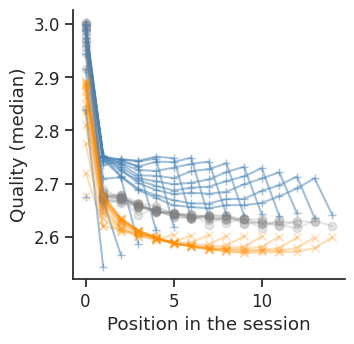

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")
    reading_session[(reading_session.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="darkorange",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="x")
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Quality (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


reading_lines = Line2D([0], [0], color="darkorange", linewidth=1, marker="x")
random_lines = Line2D([0], [0], color="grey", linewidth=1, marker="o", alpha=0.5)
tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")

labels = ["Reading sequence", "Navigation tree", "Random walker"]
plt.legend([reading_lines, tolast_lines, random_lines], labels, prop={'size': 9}, loc="upper right").remove()

fig.savefig('quality.pdf', dpi=fig.dpi, bbox_inches='tight')

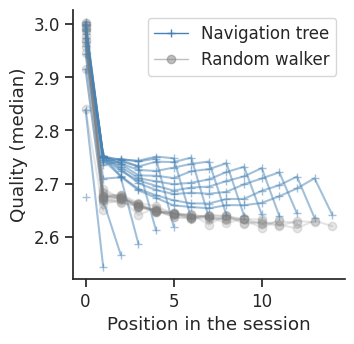

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")

    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Quality (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

random_lines = Line2D([0], [0], color="grey", linewidth=1, marker="o", alpha=0.5)
tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")

labels = ["Navigation tree", "Random walker"]
plt.legend([ tolast_lines, random_lines], labels, prop={'size': 12}, loc="upper right")

fig.savefig('quality_slides.pdf', dpi=fig.dpi, bbox_inches='tight')

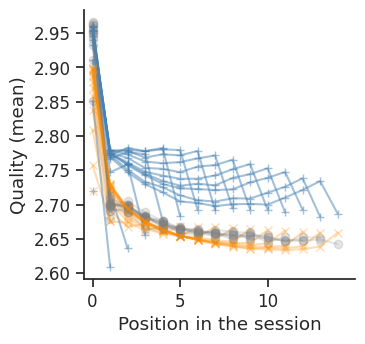

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "avg_score"
for i in reading_session.session_len.unique():
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")
    reading_session[(reading_session.session_len==i)]\
        .plot(x="position", 
              y="average_score", color="darkorange",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="x")
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Quality (mean)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim((-0.5,15))
plt.xticks([0,5,10], [0,5,10])


reading_lines = Line2D([0], [0], color="darkorange", linewidth=1, marker="x")
random_lines = Line2D([0], [0], color="grey", linewidth=1, marker="o", alpha=0.5)
tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")

labels = ["Reading sequence", "Navigation tree", "Random walker"]
plt.legend([reading_lines, tolast_lines, random_lines], labels, prop={'size': 9}, loc="upper right").remove()

fig.savefig('quality_mean.pdf', dpi=fig.dpi, bbox_inches='tight')

-----

In [8]:
pagecentric_quality_navigationtolast = pd.read_pickle("data/pagecentric_quality_navigationtolast.pkl")\
            .sort_values(["path_length", "position"])
pagecentric_quality_navigationtolast.head()

,path_length,position,avg_avg_score,avg_quantiles,total_articles,avg_median_score,median_quantiles,avg_median,median_median
168,1,0,1.193377,"[0.24651643188843694, 1.0972877955273002, 1.85...",5876796,1.193377,"[0.24651643188843694, 1.0972877955272995, 1.85...",1.097288,1.097288
242,2,0,1.430047,"[0.5688146646740968, 1.3754683295666634, 2.104...",4060307,1.430047,"[0.5688146646740968, 1.3754683295666634, 2.104...",1.375468,1.375468
456,2,1,2.192065,"[1.7562867653246306, 2.25428719963152, 2.67370...",4068660,2.104210,"[1.572490926144111, 2.2091666708484596, 2.6254...",2.254287,2.254287
55,3,0,1.613561,"[0.892735833337, 1.584769446009114, 2.26421888...",2794288,1.613561,"[0.892735833337, 1.584769446009114, 2.26421888...",1.584769,1.584769
129,3,1,2.246841,"[1.775977728072976, 2.3006253277335493, 2.7632...",2798901,2.165567,"[1.599881936540713, 2.245611262178715, 2.71791...",2.300625,2.300625


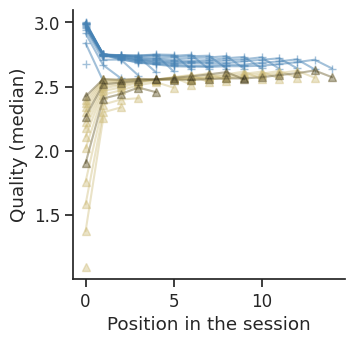

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    pagecentric_quality_navigationtolast[(pagecentric_quality_navigationtolast.path_length==i)]\
        .plot(x="position", 
              y="median_median", color="y",
              label="Len: {}".format(i), alpha=0.4,
              ax=ax, marker="^")
    
    
pagecentric_quality_navigationtolast[(pagecentric_quality_navigationtolast.path_length==5)]\
    .plot(x="position", 
          y="median_median", color="black",
          label="Len: {}".format(i), alpha=0.2,
          ax=ax, marker="^")


pagecentric_quality_navigationtolast[(pagecentric_quality_navigationtolast.path_length==10)]\
    .plot(x="position", 
          y="median_median", color="black",
          label="Len: {}".format(i), alpha=0.2,
          ax=ax, marker="^")
    
    
pagecentric_quality_navigationtolast[(pagecentric_quality_navigationtolast.path_length==15)]\
    .plot(x="position", 
          y="median_median", color="black",
          label="Len: {}".format(i), alpha=0.2,
          ax=ax, marker="^")


ax.set_xlabel("Position in the session")
ax.set_ylabel("Quality (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")
pagecentric_lines = Line2D([0], [0], color="y", linewidth=1, marker="^")

labels = ["Session aggregation", "Page aggregation"]
plt.legend([tolast_lines, pagecentric_lines],
           labels, prop={'size': 9}, loc="lower right").remove()

fig.savefig('quality_micro_macro.pdf', dpi=fig.dpi, bbox_inches='tight')

--------

In [10]:
random_walker_biased = pd.read_pickle("data/quality_randomwalker_biased.pkl")\
        .sort_values(["session_len", "position"])
random_walker_biased = random_walker_biased[(random_walker_biased.session_len<=15)
                                            &(random_walker_biased.session_len>1)]
random_walker_biased.head()

,session_len,position,avg_score,total_pageloads,quantiles,median
69,2,0,2.944601,31906174,"[2.3169552813724033, 2.973206345688698, 3.6904...",2.973206
132,2,1,2.557985,31895307,"[1.9163614642760303, 2.4772969946999153, 3.259...",2.477297
18,3,0,3.021006,11232752,"[2.369936427340025, 3.069393308530336, 3.77334...",3.069393
39,3,1,2.805473,11231598,"[2.1865029045074773, 2.750278138196672, 3.5226...",2.750278
104,3,2,2.568527,11228702,"[1.9187896619759972, 2.4862664005676636, 3.280...",2.486266


In [11]:
random_walker_biased_fixed = pd.read_pickle("data/quality_randomwalker_biased_fixed_len.pkl")\
        .sort_values(["session_len", "position"])
random_walker_biased_fixed = random_walker_biased_fixed[(random_walker_biased_fixed.session_len<=15)
                                            &(random_walker_biased_fixed.session_len>1)]
random_walker_biased_fixed.head()

,session_len,position,avg_score,total_pageloads,quantiles,median
69,2,0,2.851098,87579831,"[2.235462555700061, 2.8390050830047056, 3.5907...",2.839005
132,2,1,2.623315,87567176,"[2.004780846126034, 2.5552195674307763, 3.3250...",2.555220
18,3,0,2.910254,19736717,"[2.2743692576890444, 2.9133247975165473, 3.660...",2.913325
39,3,1,2.662214,19734343,"[2.048312273483269, 2.5941946585322695, 3.3700...",2.594195
104,3,2,2.634143,19734087,"[2.0186479586559085, 2.5646245138590444, 3.338...",2.564625


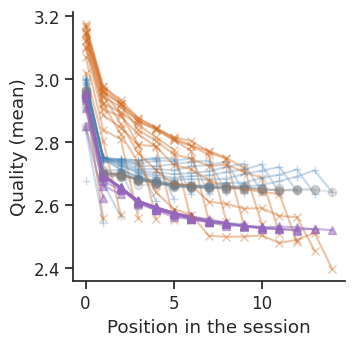

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))


for i in reading_session.session_len.unique():
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="+")
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y="avg_score", color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")
    random_walker_biased[(random_walker_biased.session_len==i)]\
        .plot(x="position", 
              y="avg_score", color="chocolate",
              label="Len: {}".format(i), alpha=0.4,
              ax=ax, marker="x")
    random_walker_biased_fixed[(random_walker_biased_fixed.session_len==i)]\
        .plot(x="position", 
              y="avg_score", color="tab:purple",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="^")

    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Quality (mean)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend().remove()

fig.savefig('quality_mean_rw.pdf', dpi=fig.dpi, bbox_inches='tight')